In [25]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [26]:
dataset=load_digits()
x,y=dataset.data,dataset.target

In [27]:
for class_name,class_count in zip(dataset.target_names,np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [28]:
y_binary_imbalanced=y.copy()
y_binary_imbalanced[y_binary_imbalanced!=1]=0
print("original labels",y[1:30])
print("new binary labels:",y_binary_imbalanced[1:30])

original labels [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
new binary labels: [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [29]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int64)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y_binary_imbalanced,random_state=0)
from sklearn.svm import SVC
svc=SVC(kernel="rbf",C=1).fit(x_train,y_train)
svc.score(x_test,y_test)

0.9955555555555555

### Dummy Classifiers

In [7]:
from sklearn.dummy import DummyClassifier
dummy_majority=DummyClassifier(strategy="most_frequent").fit(x_train,y_train)
y_dummy_predictions=dummy_majority.predict(x_test)
y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
dummy_majority.score(x_test,y_test)

0.9044444444444445

### Confusion matrices

In [9]:
from sklearn.metrics import confusion_matrix
dummy_classifier=DummyClassifier(strategy="most_frequent").fit(x_train,y_train)
y_majority_predicted=dummy_classifier.predict(x_test)
confusion=confusion_matrix(y_test,y_majority_predicted)
print(confusion)

[[407   0]
 [ 43   0]]


In [10]:
dummy_classifier=DummyClassifier(strategy="stratified").fit(x_train,y_train)
y_classprop_predicted=dummy_classifier.predict(x_test)
confusion=confusion_matrix(y_test,y_classprop_predicted)
print(confusion)

[[366  41]
 [ 36   7]]


In [11]:
svm=SVC(kernel="linear",C=1).fit(x_train,y_train)
svm_predicted=svm.predict(x_test)
confusion=confusion_matrix(y_test,svm_predicted)
print(confusion)

[[402   5]
 [  5  38]]


In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(x_train,y_train)
lr_predict=lr.predict(x_test)
confusion=confusion_matrix(y_test,lr_predict)
print(confusion)

[[401   6]
 [  8  35]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
tree_predicted = dt.predict(x_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification


In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy score",accuracy_score(y_test,tree_predicted))
print("precision score",precision_score(y_test,tree_predicted))
print("recall",recall_score(y_test,tree_predicted))
print("f1 score",f1_score(y_test,tree_predicted))

accuracy score 0.9466666666666667
precision score 0.7878787878787878
recall 0.6046511627906976
f1 score 0.6842105263157895


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tree_predicted,target_names=["not 1","1"]))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



### Decision functions

In [22]:
y_scores_lr=lr.fit(x_train,y_train).decision_function(x_test)
y_proba_list=list(zip(y_test[:20],y_proba_lr[:20]))
y_proba_list

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[(0, -29.828780122412308),
 (0, -19.382862030530184),
 (0, -29.198492315019383),
 (0, -21.74628543622176),
 (0, -22.642376912827647),
 (0, -11.805930993502658),
 (1, 6.4960075848698615),
 (0, -23.35461769048256),
 (0, -27.54381690026825),
 (0, -26.888212044652814),
 (0, -31.86296841355937),
 (0, -22.486081290223364),
 (0, -25.318028584392277),
 (0, -13.384518628616874),
 (0, -13.565643429049114),
 (0, -13.308352089647723),
 (1, 12.180938449259916),
 (0, -34.362430815142936),
 (0, -13.23154393413785),
 (0, -29.593982949361617)]

### Precision-recall curves

<IPython.core.display.Javascript object>


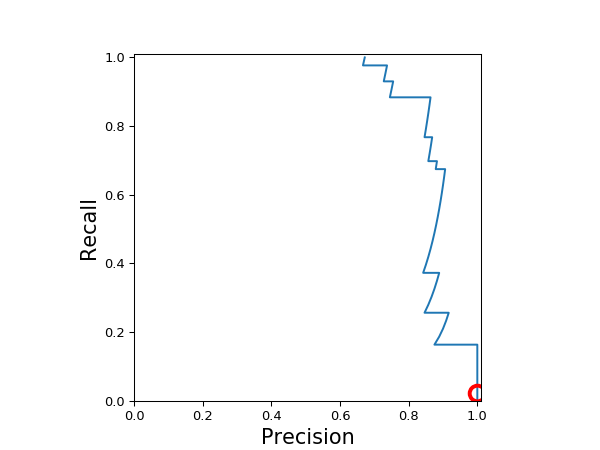

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [23]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds=precision_recall_curve(y_test,y_scores_lr)
closest_zero=np.argmax(np.abs(thresholds))
closest_zero_p=precision[closest_zero]
closest_zero_r=recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>


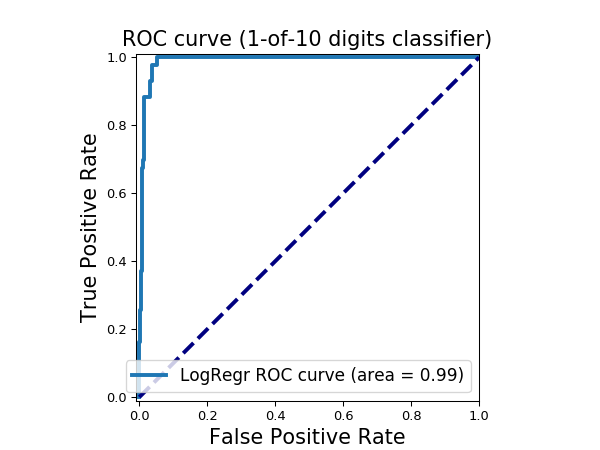

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


In [33]:
from sklearn.metrics import roc_curve,auc
x_train,x_test,y_train,y_test=train_test_split(x,y_binary_imbalanced,random_state=0)
y_score_lr=lr.fit(x_train,y_train).decision_function(x_test)
fpr_lr,tpr_lr,_=roc_curve(y_test,y_score_lr)
roc_auc_lr=auc(fpr_lr,tpr_lr)
plt.figure()
plt.xlim(-0.01,1.00)
plt.ylim(-0.01,1.01)
plt.plot(fpr_lr,tpr_lr,lw=3,label="LogRegr ROC curve (area = {:0.2f})".format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


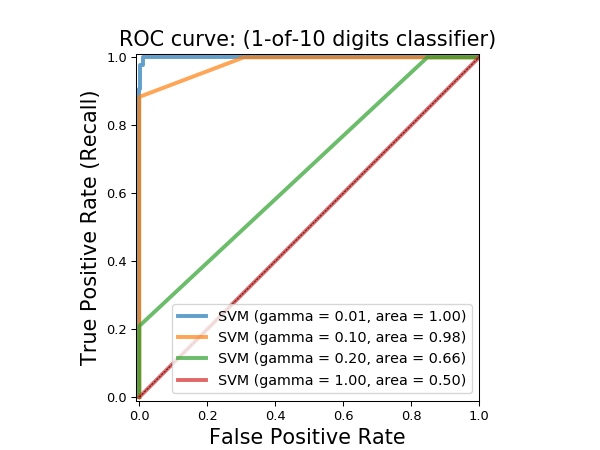

gamma=0.01 accuracy=0.91 AUC=1.00
gamma=0.10 accuracy=0.90 AUC=0.98
gamma=0.20 accuracy=0.90 AUC=0.66
gamma=1.00 accuracy=0.90 AUC=0.50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [36]:
from matplotlib import cm
plt.figure()
plt.xlim(-0.01,1.00)
plt.ylim(-0.01,1.01)
for g in [0.01,0.1,0.20,1]:
    svm=SVC(gamma=g).fit(x_train,y_train)
    y_score_svm=svm.decision_function(x_test)
    fpr_svm,tpr_svm,_=roc_curve(y_test,y_score_svm)
    roc_auc_svm=auc(fpr_svm,tpr_svm)
    accuracy_svm=svm.score(x_test,y_test)
    print("gamma={:.2f} accuracy={:.2f} AUC={:.2f}".format(g,accuracy_svm,roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()